# What Makes a Tip Higher?
#### Brandon Shellenberger
#### Feburary 9th, 2024

These are the two questions I will be answering about the data set:
1. Do people tip more by percent when the bill is higher?
2. Which day has the highest tipping by average?
3. Who is the overall best tipper?

In [97]:
# Importing External Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
# Basic Description of data
df = sns.load_dataset("tips")
print(df.head(10))
print(f"Dimensions: {df.shape}")
print(df.dtypes)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2
Dimensions: (244, 7)
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


In [99]:
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


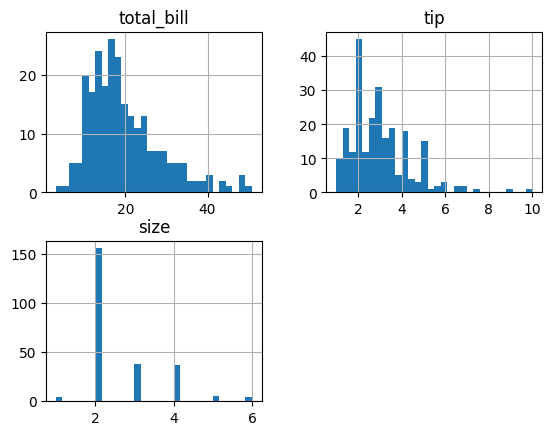

In [100]:
df.hist(bins=30)
plt.show()

### Numerical Columns Observations
Looking at the numerical columns, most of the total bills and tips are on the lower end of the spectrum and slowly tapers off as the values increase. As for the size column, there are going to be a lot of 2 member parties with a some 3 and 4 member parties, and minimal number os 1, 5, and 6 member parties.

sex
Male      157
Female     87
Name: count, dtype: int64


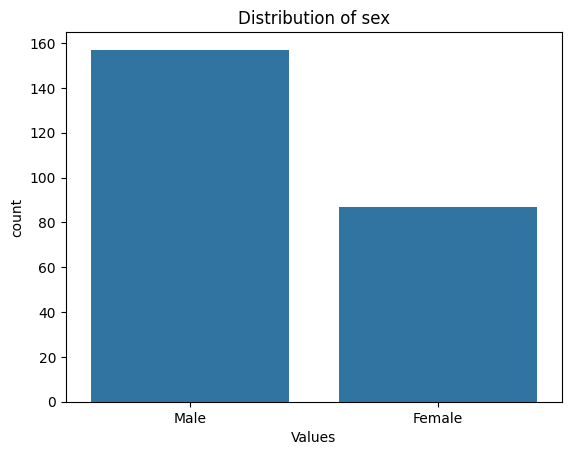

smoker
No     151
Yes     93
Name: count, dtype: int64


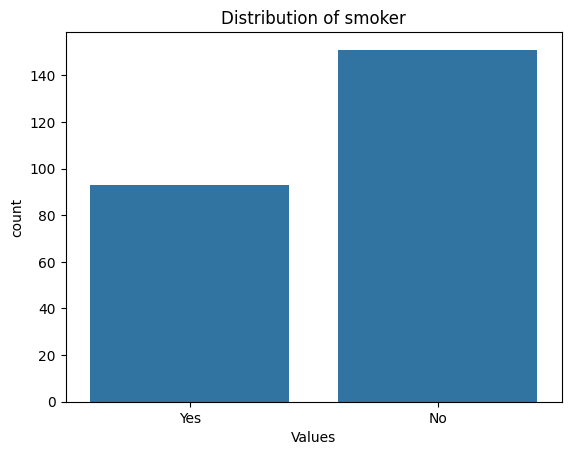

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


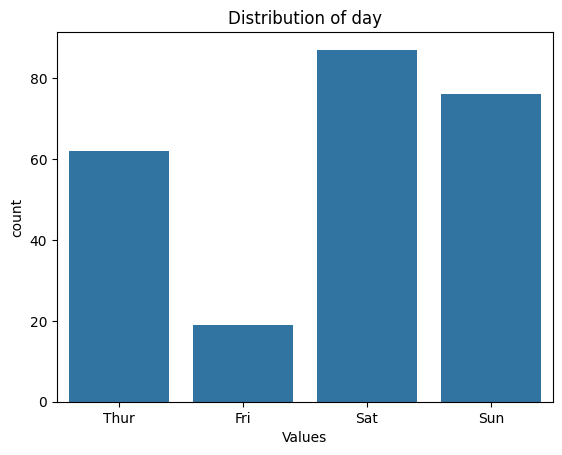

time
Dinner    176
Lunch      68
Name: count, dtype: int64


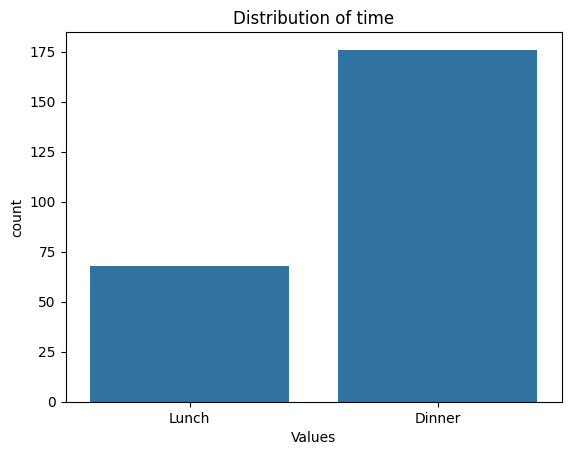

In [101]:
# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Inspect value counts by categorical column
    print(df[col].value_counts())
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.xlabel("Values")
    plt.title(f'Distribution of {col}')
    plt.show()

### Categorical Columns Observations
I am going to break this up into the different columns.
1. Mostly males are tipping in this dataset.
2. Most the dataset recorded non-smokers.
3. Surpisingly there are only a few data points recorded for Friday.
4. Most of the records are at dinner time.

In [102]:
df.rename(columns=
          {'total_bill': 'Total Bill',
           'time': 'Meal'},
          inplace=True)

df['tip_percent'] = round((df['tip']/df['Total Bill']) * 100, 2)
print(df.head(10))

   Total Bill   tip     sex smoker  day    Meal  size  tip_percent
0       16.99  1.01  Female     No  Sun  Dinner     2         5.94
1       10.34  1.66    Male     No  Sun  Dinner     3        16.05
2       21.01  3.50    Male     No  Sun  Dinner     3        16.66
3       23.68  3.31    Male     No  Sun  Dinner     2        13.98
4       24.59  3.61  Female     No  Sun  Dinner     4        14.68
5       25.29  4.71    Male     No  Sun  Dinner     4        18.62
6        8.77  2.00    Male     No  Sun  Dinner     2        22.81
7       26.88  3.12    Male     No  Sun  Dinner     4        11.61
8       15.04  1.96    Male     No  Sun  Dinner     2        13.03
9       14.78  3.23    Male     No  Sun  Dinner     2        21.85


## Initial Visualizations
In the section, I will answer the questions as in the beginning of this project. We will start with:

1. Do people tip more when the bill is higher?

I am going to show this relation with a scatter plot.

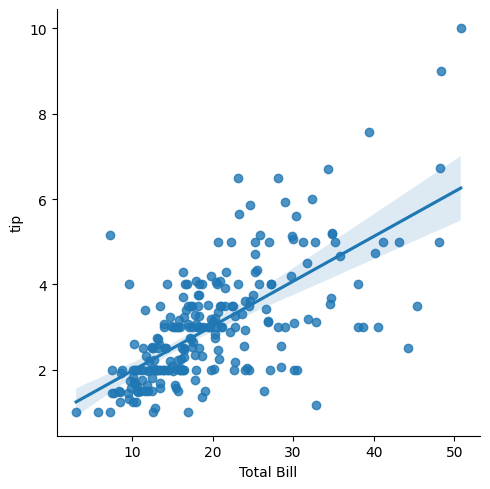

In [139]:
sns.lmplot(data=df, x='Total Bill', y='tip')


The linear model shows a trend in the postitive direction, which means that as the bill increases

2. Which day has the highest tipping by average?

In this section, I will use a bar plot to show which day (Thursday - Sunday) has the highest tipping on average.

C:\Users\holei\AppData\Local\Temp\ipykernel_2228\1215562352.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_tipping = (df.groupby('day', as_index=False)['tip'].mean())


    day       tip
0  Thur  2.771452
1   Fri  2.734737
2   Sat  2.993103
3   Sun  3.255132


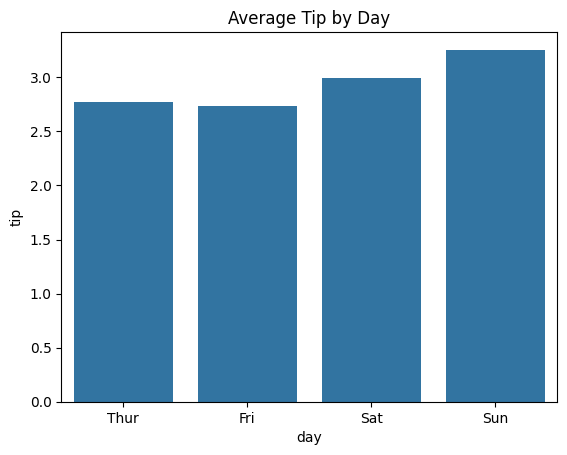

C:\Users\holei\AppData\Local\Temp\ipykernel_2228\1215562352.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_tip_percentage = (df.groupby('day', as_index=False)['tip_percent'].mean())


    day  tip_percent
0  Thur    16.126452
1   Fri    16.991579
2   Sat    15.314598
3   Sun    16.689605


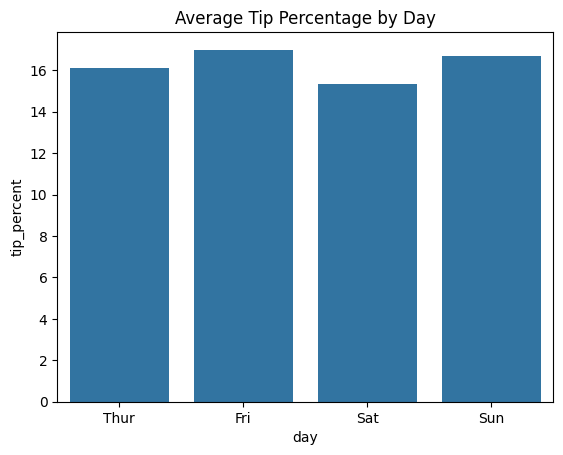

In [137]:
# bar graph of average daily tipping
daily_tipping = (df.groupby('day', as_index=False)['tip'].mean())
print(daily_tipping)
sns.barplot(data=daily_tipping, x='day', y='tip')
plt.title('Average Tip by Day')
plt.show()

#bar graph of daily average tipping by percentage of total bill
daily_tip_percentage = (df.groupby('day', as_index=False)['tip_percent'].mean())
print(daily_tip_percentage)
sns.barplot(data=daily_tip_percentage, x='day', y='tip_percent')
plt.title('Average Tip Percentage by Day')
plt.show()

The first graph shows that workers will recieve a higher tip on average if they work Sundays. Diving into this a little deeper, the second graph displays the average tip percentage for each day. Overall, the tip percentage is averaging close to the same value. This tells me that larger groups will go out to eat on Sunday, which will make the total bill higher, which will make the tip amount higher as well. In the last section, we will determine who tips the highest.